In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb


# Import Dash dependencies
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Explore functional profiles in D1-D4 regions in the demand dataset

<AxesSubplot:xlabel='task', ylabel='Vvalue'>

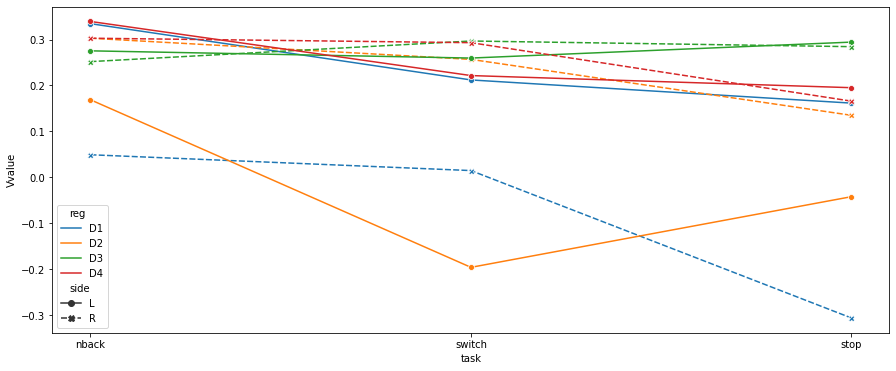

In [7]:
D = pd.read_csv(base_dir + 'Profiles/' + 'NettekovenSym32_profile.tsv',delimiter='\t')
regions = ['D1L','D1R','D2L','D2R','D3L','D3R','D4L','D4R']
colors = ['r','k','b','orange']
T = D[D.dataset=='Demand']
T = T[['condition'] + regions]
T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
# Split condition into task, difficulty, and material   
T['task']=[x.split('-')[0] for x in T.condition]
T['difficulty']=[x.split('-')[1] for x in T.condition]


plt.figure(figsize=(15,6))
sb.barplot(data=T,x='region',y='Vvalue',hue='task',err_style=None)


In [5]:
T

,condition,region,Vvalue,side,reg,task,difficulty
0,nback-E-face,D1L,0.190230,L,D1,nback,E
1,nback-E-house,D1L,0.152070,L,D1,nback,E
2,nback-H-face,D1L,0.512275,L,D1,nback,H
3,nback-H-house,D1L,0.483304,L,D1,nback,H
4,switch-E-face,D1L,0.046233,L,D1,switch,E
...,...,...,...,...,...,...,...
91,switch-H-house,D4R,0.463291,R,D4,switch,H
92,stop-E-face,D4R,0.092398,R,D4,stop,E
93,stop-E-house,D4R,0.132229,R,D4,stop,E
94,stop-H-face,D4R,0.202266,R,D4,stop,H


### Task Profiles

In [4]:
info = fp.recover_info(info_68, model_68)
profiles, conditions, cdetails = fp.get_profiles(
    model=model_68, info=info)


In [5]:
cerebellum = plot_data_flat(parcel_68, atlas, cmap=cmap_68,
                            dtype='label',
                            labels=labels_68,
                            render='plotly')


In [6]:
df = fp.get_profile_data(labels_68, info, profiles, conditions)
sessions = [2, 1, 2, 14, 2, 1, 1]
datasets = []
for d, dataset in enumerate(info.datasets):
    datasets.extend([dataset] * sessions[d])


#start of app
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.LUX])


click_region_labels = dcc.Markdown(id='clicked-region')


app.layout = html.Div([html.Div([
    html.H1('Functional Atlas Explorer'),

    html.Div([

        dcc.Graph(id="figure-cerebellum", figure=cerebellum,
                  clear_on_unhover=False),

        dcc.Tooltip(id="graph-tooltip")])
], style={'width': '49%', 'display': 'inline-block'}),

    html.Div([

        html.P('Display functions for a selected region and dataset.'),


        html.Div(children=[
            html.Label('Dataset'),
            dcc.Dropdown(datasets, id='chosen_dataset',
                         value=datasets[0], clearable=False),
        ], style={'padding': 10, 'flex': 1}),

        html.Div([
            dbc.Row([
                dbc.Col([
                    dbc.Card([
                        dbc.CardBody([
                            # html.H5('Word Cloud',className='text-center'),
                            html.Img(id="image_wc"),
                        ])
                    ])
                ], width={'size': 12, "offset": 0, 'order': 1}, style={'padding-left': 25, 'padding-right': 25}, className='text-center'),
            ])
        ]),

        html.Div([
            html.H4(id='clicked-region'),
        ]),

    ], style={'width': '49%', 'display': 'inline-block'}),

], style={'display': 'flex', 'flex-direction': 'row'})


def plot_wordcloud(df, dset, region):
    reg = 'A1L'
    # When initiliazing the website and if clickin on a null region, show no conditions
    if region is not None and region['points'][0]['text'] != '0':
        # get the region name
        reg = region['points'][0]['text']
    d = df.conditions[(df.dataset == dset) & (df.label == reg)]
    wc = WordCloud(
        background_color='white',
        width=512,
        height=384
    ).generate(' '.join(d))
    return wc.to_image()


@app.callback(

    Output('image_wc', 'src'),
    # Input(component_id='figure-cerebellum', component_property='clickData'),
    Input(component_id='image_wc', component_property='src'),
    Input(component_id='chosen_dataset', component_property='value'),
    Input(component_id='figure-cerebellum', component_property='clickData'))
def make_image(b, dset, region):
    img = BytesIO()
    plot_wordcloud(df, dset, region).save(img, format='PNG')
    return 'data:image/png;base64,{}'.format(base64.b64encode(img.getvalue()).decode())


In [7]:
if __name__=='__main__':
    app.run_server()


Dash app running on http://127.0.0.1:8050/
